In [1]:
import os
import pandas as pd
import json
from datetime import datetime, timedelta
from dateutil import parser


path = '/home/aacastro/mchai/companies'
BASE_DIR = '/home/aacastro/mchai/companies'
CSV_PATH = '/home/aacastro/Alejandro/ACA_MultichanelAI_2025/DATA/S&P500_Data.csv'

## Get CEOS

In [29]:
# Diccionario para almacenar nombres únicos de CEOs por empresa
ceos_by_company = {}

# Recorrer la estructura de directorios
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):  # Filtrar solo archivos CSV
            file_path = os.path.join(root, file)  # Obtener la ruta completa del archivo
            try:
                df = pd.read_csv(file_path)  # Cargar el archivo CSV como un DataFrame
                if 'title' in df.columns and 'name' in df.columns:  # Verificar columnas necesarias
                    # Filtrar observaciones donde 'Title' es 'CEO'
                    df_ceo = df.loc[df['title'] == 'CEO'].copy()
                    
                    if not df_ceo.empty:
                        # Extraer el nombre de la empresa desde la ruta
                        company_name = root.split('/')[-3]
                        # Obtener nombres únicos de los CEOs
                        unique_ceos = df_ceo['name'].unique()
                        
                        # Agregar nombres al diccionario por empresa
                        if company_name not in ceos_by_company:
                            ceos_by_company[company_name] = set(unique_ceos)
                        else:
                            ceos_by_company[company_name].update(unique_ceos)
            except Exception as e:
                print(f"Error leyendo {file_path}: {e}")

In [32]:
print("Empresas con más de un CEO: \n")

for company, ceos in ceos_by_company.items():
    ceos_by_company[company] = list(ceos)

    if len(ceos_by_company[company]) > 1:
        CEO_change = True
        ceos = ceos_by_company[company]
        print(company, ceos)
    else:
        CEO_change = False
        ceos = ceos_by_company[company]

Empresas con más de un CEO: 

AWK ['Susan Hardwick', 'Susan']
AMZN ['Jeff Bezos', 'Andy Jassy']
PFE ['Albert Bourla', 'Albert Borla']
KKR ['Craig Lawson', 'Craig Larson']
MTCH ['Bernard Kim', 'BK']
WELL ['Sean [LastName]', 'Sean']
AMGN ['Bob Bradshaw', 'Bob Bradway']
BKNG ['Glenn Fogle', 'Glenn Fodule', 'Glenn Fodil', 'Glenn Fogel']
IFF ['Eric Fearwald', 'Eric Fehrwald', 'Eric Vierwald']
ISRG ['Gary Guthardt', 'Gary Gutards', 'Gary Guttart', 'Gary Gutarts', 'Gary Guthart']
WMT ['Doug McMillon', 'Doug McMillan']
COST ['Richard Calanti', 'Richard Galante']
PGR ['Tricia Griffith', 'Trish Griffith', 'Trisha Griffith', 'Tricia Griffiths']
PSA ['Joe Russell', 'Ryan Burke']
T ['John Stankey', 'John Stanky']
UPS ['Carol Tomay', 'Carol Tomei']
WFC ['Charlie Sharp', 'Charlie Scharf', 'Charlie Sharpe']
PLD ['Tracy Ward', 'Hamid Moghadam']
MPC ['Mary Ann Mannin', 'Marianne Manin', 'Mike Hennigan']
UBER ['Dara Khashashahi', 'Dara Khosrowshahi', 'Dara Khosrashahi']
GEV ['Scott Strasik', 'Scott Straz

## Get null titles

In [2]:
# Lista para guardar archivos con nulos en 'title'
null_title_files = []

# Recorrer el directorio recursivamente
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            try:
                df = pd.read_csv(file_path)
                if 'title' in df.columns:
                    null_count = df['title'].isna().sum()
                    if null_count > 0:
                        null_title_files.append((file_path, null_count))
            except Exception as e:
                print(f"Error leyendo {file_path}: {e}")

In [4]:
len(null_title_files)

2252

In [3]:
# Imprimir resumen
print("Archivos con valores nulos en 'title':")
for path, count in null_title_files:
    print(f"{path} -> {count} nulos")
    

Archivos con valores nulos en 'title':
/home/aacastro/mchai/companies/KMI/2024/Q2/transcript.csv -> 5 nulos
/home/aacastro/mchai/companies/KMI/2024/Q1/transcript.csv -> 53 nulos
/home/aacastro/mchai/companies/KMI/2023/Q2/transcript.csv -> 72 nulos
/home/aacastro/mchai/companies/KMI/2023/Q1/transcript.csv -> 61 nulos
/home/aacastro/mchai/companies/KMI/2023/Q3/transcript.csv -> 76 nulos
/home/aacastro/mchai/companies/KMI/2021/Q4/transcript.csv -> 76 nulos
/home/aacastro/mchai/companies/KMI/2021/Q2/transcript.csv -> 96 nulos
/home/aacastro/mchai/companies/KMI/2021/Q1/transcript.csv -> 110 nulos
/home/aacastro/mchai/companies/KMI/2021/Q3/transcript.csv -> 66 nulos
/home/aacastro/mchai/companies/KMI/2020/Q4/transcript.csv -> 108 nulos
/home/aacastro/mchai/companies/KMI/2020/Q3/transcript.csv -> 87 nulos
/home/aacastro/mchai/companies/KMI/2022/Q4/transcript.csv -> 68 nulos
/home/aacastro/mchai/companies/KMI/2022/Q2/transcript.csv -> 101 nulos
/home/aacastro/mchai/companies/KMI/2022/Q1/transc

## Get S&P500 label list

In [ ]:
# Cargar CSV de referencia
company_df = pd.read_csv(CSV_PATH)
symbol_to_company = dict(zip(company_df['Symbol'], company_df['Company']))

records = []

# Recorrer todos los archivos LEVEL_3.json
for root, _, files in os.walk(BASE_DIR):
    for file in files:
        if file == "LEVEL_3.json":
            json_path = os.path.join(root, file)

            # Extraer info del path: /companies/AAPL/2018/Q3/LEVEL_3.json
            parts = json_path.split(os.sep)
            try:
                symbol = parts[-4]
                year = int(parts[-3])
                quarter = parts[-2]

                # Leer JSON
                with open(json_path, 'r') as f:
                    data = json.load(f)

                # Parsear conference_date si está disponible
                conference_date = data.get("event", {}).get("conference_date")
                if conference_date:
                    dt = parser.isoparse(conference_date)

                    # Calcular fechas relativas (solo fechas, sin hora, en formato ISO 8601)
                    start_date = (dt - timedelta(days=7)).date().isoformat()  # YYYY-MM-DD
                    end_date = (dt + timedelta(days=7)).date().isoformat()    # YYYY-MM-DD
                    timestamp = dt.date().isoformat()                         # YYYY-MM-DD
                    day = dt.day
                    month = dt.month
                else:
                    raise ValueError("conference_date no disponible en el JSON")

                # Añadir campo 'event' actualizado
                data['event']['year'] = year
                data['event']['quarter'] = int(quarter[1])
                data['event']['date'] = timestamp

                company = symbol_to_company.get(symbol, "Unknown")

                # Agregar al dataset
                records.append({
                    "symbol": symbol,
                    "company": company,
                    "year": year,
                    "quarter": quarter,
                    "timestamp": timestamp,
                    "label_start_date": start_date,
                    "label_end_date": end_date,
                    "day": day,
                    "month": month,
                })

            except Exception as e:
                print(f"Error procesando {json_path}: {e}")

# Crear DataFrame final
df = pd.DataFrame(records)
df.head()

,symbol,company,year,quarter,timestamp,label_start_date,label_end_date,day,month
0,KMI,"Kinder Morgan, Inc.",2024,Q2,2024-07-17,2024-07-10,2024-07-24,17,7
1,KMI,"Kinder Morgan, Inc.",2024,Q1,2024-04-17,2024-04-10,2024-04-24,17,4
2,KMI,"Kinder Morgan, Inc.",2024,Q3,2024-10-16,2024-10-09,2024-10-23,16,10
3,KMI,"Kinder Morgan, Inc.",2023,Q4,2024-01-17,2024-01-10,2024-01-24,17,1
4,KMI,"Kinder Morgan, Inc.",2023,Q2,2023-07-19,2023-07-12,2023-07-26,19,7


In [4]:
df.shape

(4031, 9)

In [5]:
df.to_csv('Conferences_data_final.csv')

## Get null questions_and_answers

In [8]:
records = []

for root, _, files in os.walk(BASE_DIR):
    for file in files:
        if file == "LEVEL_4.json":
            json_path = os.path.join(root, file)

            try:
                with open(json_path, 'r') as f:
                    data = json.load(f)
            except Exception as e:
                print(f"Error leyendo {json_path}: {e}")
                continue

            if "questions_and_answers" in data and data["questions_and_answers"] is not None:
                parts = os.path.normpath(root).split(os.sep)
                
                # Se espera algo como: [..., companies, <COMPANY>, <YEAR>, <QUARTER>]
                if len(parts) >= 4:
                    company = parts[-3]
                    year = parts[-2]
                    quarter = parts[-1]

                    records.append({
                        "path": root,
                        "company": company,
                        "year": year,
                        "quarter": quarter
                    })

df = pd.DataFrame(records)

In [ ]:
# df.to_csv("/home/aacastro/Alejandro/ACA_MultichanelAI_2025/src/GENERAL/OK_DATA.csv")

## Get Financial Data statements

In [24]:
def buscar_financial_data(directorio_raiz, cadena="financial data"):
    archivos_con_match = []

    for root, _, files in os.walk(directorio_raiz):
        for file in files:
            if file == "LEVEL_4.json":
                ruta_archivo = os.path.join(root, file)
                try:
                    with open(ruta_archivo, 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        # Verifica si la clave "text" existe y contiene "financial data"
                        if data["questions_and_answers"] is not None and cadena in data["questions_and_answers"].lower():
                            archivos_con_match.append(ruta_archivo)
                except (json.JSONDecodeError, UnicodeDecodeError, OSError) as e:
                    # Puedes loguear esto si te interesa saber qué archivos fallan
                    pass

    return archivos_con_match

In [28]:
resultados = buscar_financial_data(BASE_DIR, "financial data")

print("Archivos que contienen 'financial data en preguntas y respuestas':")
for archivo in resultados:
    print(archivo)

Archivos que contienen 'financial data en preguntas y respuestas':
/home/aacastro/mchai/companies/MA/2020/Q2/LEVEL_4.json
/home/aacastro/mchai/companies/MA/2020/Q3/LEVEL_4.json
/home/aacastro/mchai/companies/V/2024/Q4/LEVEL_4.json
/home/aacastro/mchai/companies/V/2021/Q3/LEVEL_4.json
/home/aacastro/mchai/companies/V/2022/Q3/LEVEL_4.json
/home/aacastro/mchai/companies/SPGI/2021/Q4/LEVEL_4.json
/home/aacastro/mchai/companies/GM/2023/Q1/LEVEL_4.json
/home/aacastro/mchai/companies/ADBE/2019/Q2/LEVEL_4.json
/home/aacastro/mchai/companies/INTU/2020/Q2/LEVEL_4.json


## LLM plots

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:

def map_family(model_name):
    name = model_name.lower()
    if "llama" in name:
        return "llama"
    elif "phi" in name:
        return "phi"
    elif "qwen" in name:
        return "qwen"
    elif "deepseek" in name:
        return "deepseek"
    elif "gemma" in name:
        return "gemma"
    elif "mistral" in name:
        return "mistral"
    else:
        return "other"

def extract_model_size(model_name):
    match = re.search(r"[:\-](\d+(\.\d+)?)b", model_name.lower())
    return float(match.group(1)) if match else 1.0  # Por defecto 1.0

def plot_f1_vs_time_all_models(df: pd.DataFrame, task_name: str, results_path: str):
    # Extraer familia y tamaño
    df["model_family"] = df["model_name"].apply(map_family)
    df["model_size"] = df["model_name"].apply(extract_model_size)

    plt.figure(figsize=(12, 7))
    scatter = sns.scatterplot(
        data=df,
        x="elapsed_time",
        y="f1_score",
        hue="model_family",
        size="model_size",
        sizes=(50, 400),
        alpha=0.7,
        palette="tab10",
        legend="brief"
    )

    for _, row in df.iterrows():
        plt.text(
            row["elapsed_time"],
            row["f1_score"],
            row["model_name"],
            fontsize=8,
            ha="left",
            va="center",
            rotation=30
        )

    plt.xlabel("Elapsed Time (s)")
    plt.ylabel("F1 Score")
    plt.title(f"F1 Score vs Time - {task_name}")
    plt.grid(True)
    # plt.legend(title="Model Family", bbox_to_anchor=(1.05, 1), loc='upper left')
    # output_path = os.path.join(results_path, f"{task_name.replace(' ', '_')}_scatter.png")
    plt.tight_layout()
    # plt.savefig(output_path, bbox_inches="tight")
    plt.show()

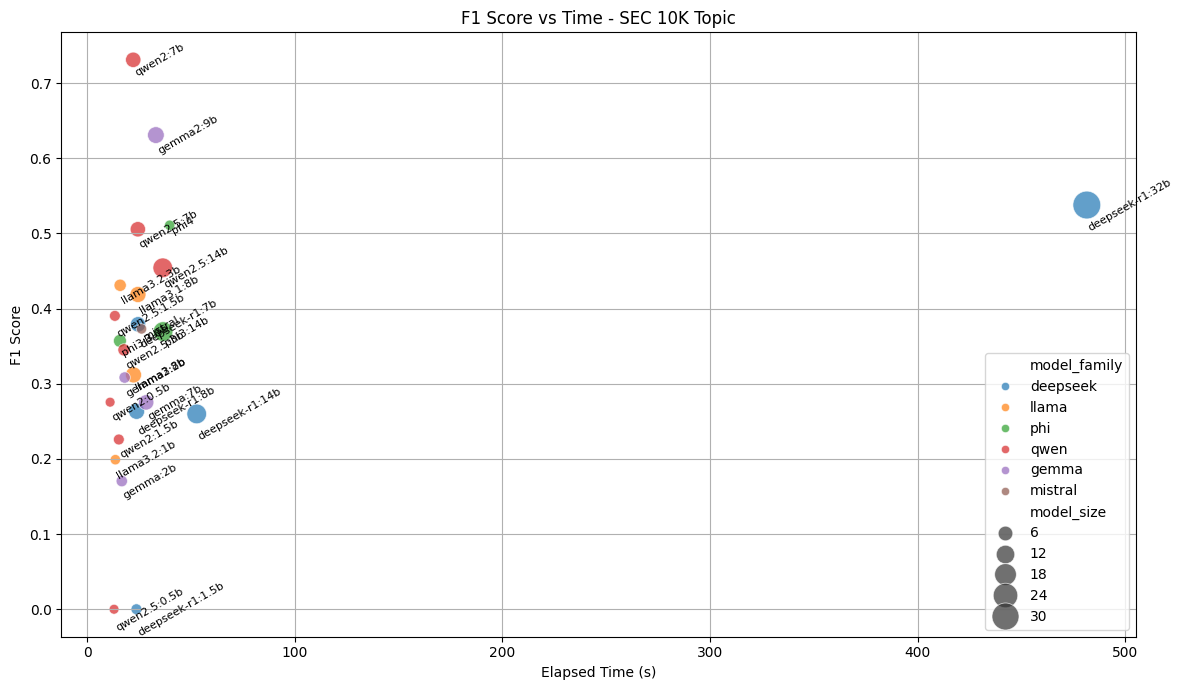

In [8]:
# df = pd.read_csv("/home/aacastro/Alejandro/ACA_MultichanelAI_2025/clean_src/ModelsResults/QA/results/models_metrics.csv")
# plot_f1_vs_time_all_models(df, task_name="Question/Answer Detection", results_path="/home/aacastro/Alejandro/ACA_MultichanelAI_2025/clean_src/ModelsResults/QA/results/")

# df = pd.read_csv("/home/aacastro/Alejandro/ACA_MultichanelAI_2025/clean_src/ModelsResults/Monologues/results/models_metrics.csv")
# plot_f1_vs_time_all_models(df, task_name="Monologues Detection", results_path="/home/aacastro/Alejandro/ACA_MultichanelAI_2025/clean_src/ModelsResults/Monologues/results/")

df = pd.read_csv("/home/aacastro/Alejandro/ACA_MultichanelAI_2025/clean_src/ModelsResults/SEC10K/results/models_metrics.csv")
plot_f1_vs_time_all_models(df, task_name="SEC 10K Topic", results_path="/home/aacastro/Alejandro/ACA_MultichanelAI_2025/clean_src/ModelsResults/SEC10K/results/")

In [6]:
def plot_f1_vs_time_filtered(df: pd.DataFrame, task_name: str, results_path: str):
    # Filtro de modelos con tiempo < 200 y f1_score > 0.85
    filtered_df = df[(df["elapsed_time"] < 200) & (df["f1_score"] > 0.80)].copy()

    # Extraer familia y tamaño del modelo
    filtered_df["model_family"] = filtered_df["model_name"].apply(map_family)
    filtered_df["model_size"] = filtered_df["model_name"].apply(extract_model_size)

    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        data=filtered_df,
        x="elapsed_time",
        y="f1_score",
        hue="model_family",
        size="model_size",
        sizes=(50, 400),
        alpha=0.8,
        palette="tab10",
        legend="brief"
    )

    for _, row in filtered_df.iterrows():
        plt.text(
            row["elapsed_time"],
            row["f1_score"],
            row["model_name"],
            fontsize=8,
            ha="left",
            va="center",
            rotation=30
        )

    plt.xlabel("Elapsed Time (s)")
    plt.ylabel("F1 Score")
    plt.title(f"Top Models (F1 > 0.85, Time < 200s) - {task_name}")
    plt.grid(True)
    # plt.legend(title="Model Family", bbox_to_anchor=(1.05, 1), loc='upper left')
    # output_path = os.path.join(results_path, f"{task_name.replace(' ', '_')}_top_models_scatter.png")
    plt.tight_layout()
    # plt.savefig(output_path, bbox_inches="tight")
    plt.show()

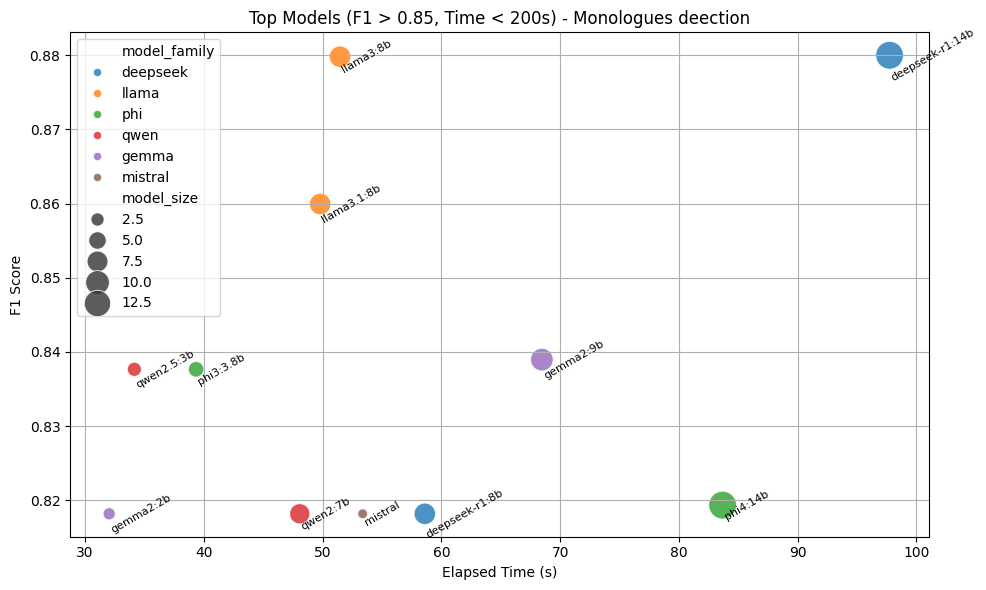

In [7]:
plot_f1_vs_time_filtered(df, task_name="Monologues deection", results_path="figuras/")